# Задание

### Цель: проверить гипотезу о том, что средняя вероятность клика в первой половине датасета (по времени) и во второй половине датасета (по времени) не отличаются.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from numpy.random import binomial
from numpy.random import normal
import pandas as pd
from sklearn.model_selection import train_test_split

Отсортируйте данные по времени и разбейте на две равные части - part1 и part2.

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
df = pd.read_csv("advertising.csv")
df = df[['Timestamp','Daily Time Spent on Site']].copy()
df.sort_values(by='Timestamp',inplace=True)

N = len(df)/2

part1, part2 = train_test_split(df, test_size=0.5, random_state=111, shuffle=False)
part1.shape, part2.shape

((500, 2), (500, 2))

Предположим, что данных мало. Оставим только первые 10 строк в таблицах part1 и part2. В этом примере нам необходимо использовать тест Стьюдента, так как число наблюдений мало.

In [22]:
part1 = part1.iloc[:10]
part2 = part2.iloc[:10]

part1.shape, part2.shape

((10, 2), (10, 2))

Создайте два массива - sample1 и sample2, содержащие значения из столбца Daily Time Spent on Site для part1 и part2 соответственно.

In [23]:
sample1 = part1['Daily Time Spent on Site'].values
sample2 = part2['Daily Time Spent on Site'].values

(array([1., 1., 1., 0., 0., 0., 0., 1., 1., 5.]),
 array([36.56 , 41.025, 45.49 , 49.955, 54.42 , 58.885, 63.35 , 67.815,
        72.28 , 76.745, 81.21 ]),
 <a list of 10 Patch objects>)

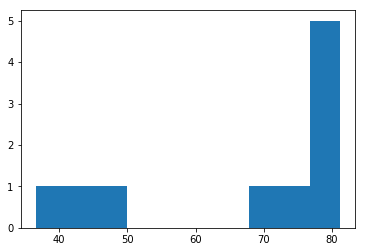

In [31]:
plt.hist(sample1)

(array([1., 2., 1., 0., 1., 1., 1., 0., 2., 1.]),
 array([35.49 , 40.518, 45.546, 50.574, 55.602, 60.63 , 65.658, 70.686,
        75.714, 80.742, 85.77 ]),
 <a list of 10 Patch objects>)

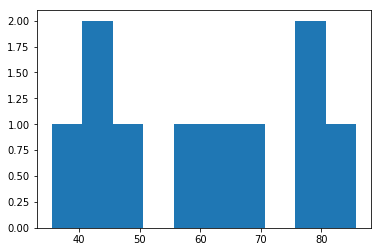

In [32]:
plt.hist(sample2)

Вычислите выборочное среднее для каждого сэмпла (mean1, mean2) и вычислите разность этих средних значений (diff).

In [24]:
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
diff = mean1 - mean2
print('mean1: %s' % mean1)
print('mean2: %s' % mean2)
print('mean1 - mean2: %s' % diff)

mean1: 67.24100000000001
mean2: 60.03000000000001
mean1 - mean2: 7.211000000000006


***Нулевая гипотеза: средние вероятности кликов не отличаются.***

Создадим функцию для вычисления выборочной дисперсии (sigma).
C помощью этой функции вычислим стандартную ошибку разности для теста Стьюдента.

In [25]:
def sigma(sample):
    N = len(sample)
    Mean = np.mean(sample)
    
    return sum([(x-Mean)**2 for x in sample])*1./(N-1)

std_pool = np.sqrt(sigma(sample1) / N + sigma(sample2) / N)
std_pool

1.1072124447357776

Напишите функцию, вычисляющую число степеней свободы в распределении Стьюдента (см. слайды). Возьмите целую часть от необходимого выражения.

In [28]:
def deg(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    s1sq = sigma(sample1)
    s2sq = sigma(sample2)
    
    return int((s1sq/n1 + s2sq/n2)**2/((s1sq/n1)**2/(n1-1) + (s2sq/n2)**2/(n2-1)))

degrees = deg(sample1, sample2)
degrees

17

Вычислите величину отступа для уровня доверия 95% (двусторонний критерий). Не забудьте, что мы используем тест Стьюдента, т.е. нам нужны квантили распределения Стьюдента!

In [35]:
confidence = 0.975
z = st.t.ppf(confidence, degrees)
margin = z * std_pool
print('z: %s' % z)

z: 2.1098155778331806


## Случайно ли различие в средних?

Проверьте нулевую гипотезу. Отвергаем её, если |diff| > margin.

In [36]:
print('margin: %s' % margin)
print('diff: %s' % diff)
print('Are they different (diff > margin)? -> %s' % (abs(diff) > margin))

margin: 2.336014063874303
diff: 7.211000000000006
Are they different (diff > margin)? -> True
